# Sponge

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

In [2]:
data = nc.Dataset('/short/v45/lxy581/mom6/input/so_mom6_v63/sponge.nc','r')

In [3]:
x = data.variables['x'][:]
y = data.variables['y'][:]
zt = data.variables['zt'][:]
zw = data.variables['zw'][:]

Idamp = data.variables['Idamp'][:,:]
ptemp = data.variables['PTEMP'][:,-1,-1]
eta   = data.variables['ETA'][:,:,:]
salt  = data.variables['SALT'][:,:,:]

In [4]:
%matplotlib inline

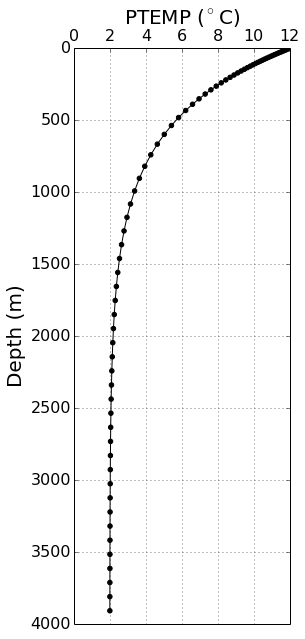

In [5]:
plt.figure(1,figsize=(5,10))

plt.plot(ptemp,zt,'k')
plt.scatter(ptemp,zt,color='k')
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')
plt.xlim(0,12)
plt.ylim(0,4000)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.gca().invert_yaxis()
plt.grid(True)
plt.xlabel('PTEMP ($^\circ$C)',fontsize=20)
plt.ylabel('Depth (m)',fontsize=20)
plt.gca().set_position([0.2,0.1,0.6,0.8])

#plt.savefig('/short/v45/lxy581/mom6/diag/v69_sponge_temp.png',dpi=600)

plt.show()

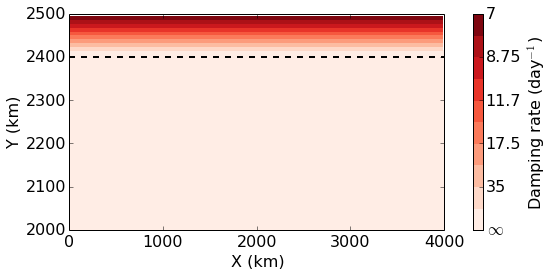

In [6]:
plt.figure(2,figsize=(8,5))

rate = 1./(7.*24.*3600.)
#rate = 1./(14.*24.*3600.)

r_level = np.arange(0,rate+rate/10.,rate/10.)
r_ticks = np.arange(0,rate+rate/5.,rate/5.)

xh = x/1.e+3
yh = y/1.e+3
X,Y=np.meshgrid(xh,yh)

pc = plt.contourf(X,Y,Idamp,cmap=plt.cm.Reds,levels=r_level)
cb = plt.colorbar(pc,ticks=r_ticks)
plt.plot([-2000,2000],[1150,1150],linewidth=2.0,linestyle='--',color='k')
plt.ylim(750,1250)
#plt.gca().set_yticks(np.arange(-1250,1250 + 500,500))
#plt.gca().set_yticklabels(['0','500','1000','1500','2000','2500'])
plt.gca().set_yticks(np.arange(750,1250 + 100,100))
plt.gca().set_yticklabels(['2000','2100','2200','2300','2400','2500'])
plt.gca().set_xticks(np.arange(-2000,2000 + 1000,1000))
plt.gca().set_xticklabels(['0','1000','2000','3000','4000'])
plt.gca().set_position([0.15,0.2,0.65,0.6])
cb.ax.set_position([0.85,0.2,0.03,0.6])
cb.set_label('Damping rate (day$^{-1}$)',y=0.5,fontsize=16)
cb.ax.set_yticklabels(['$\infty$','35','17.5','11.7','8.75','7'])
#cb.ax.set_yticklabels(['$\infty$','70.0','35.0','23.3','17.5','14.0'])
cb.ax.tick_params(labelsize=16)
plt.xlabel('X (km)',fontsize=16)
plt.ylabel('Y (km)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#plt.savefig('/short/v45/lxy581/mom6/diag/v69_sponge_relaxation.png',dpi=600)

plt.show()